## Task:

- use Keras :)
- **Predict if employee stayed or left the company**
- build confusion matrix
- experiment with parameters to get better accuracy

Necesary data pre-processing steps:
- Data Normalization (*) 
- Spliting data into training and testing sets


(\*) Read more about Scikit's ```MinMaxScaler``` or ```Normalizer``` on:
- [Normalization](http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-normalization)
- [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler)
- [Normalizer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer)

----

Dataset source: https://www.kaggle.com/ludobenistant/hr-analytics

## Additional task:

Requirements: Python and maybe basic Numpy

Pretend that the dataset is too bit to fit into single Matrix. 

**Write generator that will iterate over the data during model training.**

The generator should:

- accept batch of any size
- generate batches for training/testing data and training/testing labels
- be usable by keras ```model.fit_generator``` (check method **"fit_generator"** on [Keras page](https://keras.io/models/sequential/))


In [111]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
hr_dataset = pd.read_csv('datasets/HR_comma_sep.csv')
hr_dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


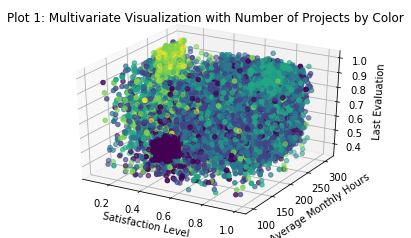

In [113]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = hr_dataset['satisfaction_level']
y = hr_dataset['average_montly_hours']
z = hr_dataset['last_evaluation']
c = hr_dataset['number_project']
_ = ax.scatter(xs=x, ys=y, zs=z, c=c)
_ = ax.set_xlabel('Satisfaction Level')
_ = ax.set_ylabel('Average Monthly Hours')
_ = ax.set_zlabel('Last Evaluation')
_ = plt.title('Plot 1: Multivariate Visualization with Number of Projects by Color')
plt.show()